In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crime-data/mel_features_9.pkl
/kaggle/input/crime-data/class_labels_9.pkl


In [2]:
import os
import librosa
import numpy as np
import pickle

In [3]:
with open('/kaggle/input/crime-data/mel_features_9.pkl', 'rb') as f:
    mel_features = pickle.load(f)
    
    
with open('/kaggle/input/crime-data/class_labels_9.pkl', 'rb') as f:
    class_labels = pickle.load(f)

In [47]:
################# mel_features list type to numpy array
mel_features_arr = np.array(mel_features)
print(mel_features_arr.shape)
# Convert to shape (128, 64, 1)
mel_features_arr_1 = np.expand_dims(mel_features_arr, axis=-1)
print(mel_features_arr_1.shape)

(1216, 128, 128)
(1216, 128, 128, 1)


In [42]:
print(class_labels)

['gagged_sound', 'gagged_sound', 'gagged_sound', 'gagged_sound', 'gagged_sound', 'gagged_sound', 'gagged_sound', 'gagged_sound', 'gagged_sound', 'gagged_sound', 'gagged_sound', 'gagged_sound', 'gagged_sound', 'gagged_sound', 'gagged_sound', 'gagged_sound', 'gagged_sound', 'gagged_sound', 'gagged_sound', 'gagged_sound', 'gagged_sound', 'gagged_sound', 'gagged_sound', 'gagged_sound', 'gagged_sound', 'gagged_sound', 'gagged_sound', 'gagged_sound', 'gagged_sound', 'gagged_sound', 'gagged_sound', 'gagged_sound', 'gagged_sound', 'gagged_sound', 'gagged_sound', 'gagged_sound', 'gagged_sound', 'gagged_sound', 'gagged_sound', 'gagged_sound', 'gagged_sound', 'gagged_sound', 'gagged_sound', 'gagged_sound', 'gagged_sound', 'gagged_sound', 'gagged_sound', 'gagged_sound', 'gagged_sound', 'gagged_sound', 'gagged_sound', 'gagged_sound', 'gagged_sound', 'gagged_sound', 'gagged_sound', 'gagged_sound', 'gagged_sound', 'gagged_sound', 'gagged_sound', 'gagged_sound', 'gagged_sound', 'gagged_sound', 'gagged

In [44]:
y = np.array(class_labels)
# print(len(y))

In [45]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y_label_encoding = labelencoder.fit_transform(y)
y=to_categorical(labelencoder.fit_transform(y))
print(y)
print(type(y))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
<class 'numpy.ndarray'>


In [48]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
x_train_mel, x_val_mel, y_train, y_val = train_test_split(
    mel_features_arr_1, y_label_encoding, test_size=0.10, random_state=0)

In [40]:
print(type(y_train))
print(x_train_mel.shape)

<class 'numpy.ndarray'>
(1094, 128, 128, 1)


In [10]:
occurrences = np.bincount(y_val)

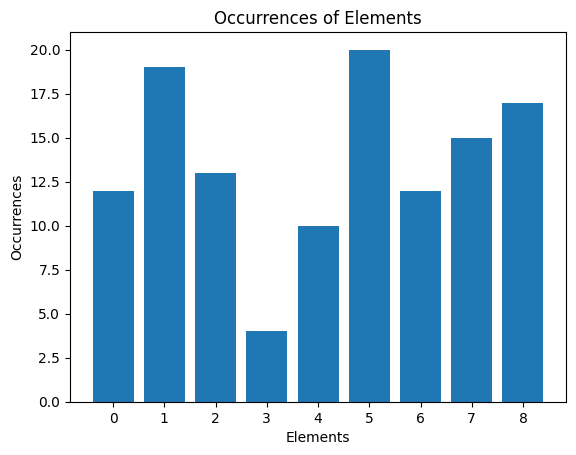

In [11]:
import matplotlib.pyplot as plt
# Create a list of unique elements (0 to 8)
unique_elements = np.arange(9)

# Plot the occurrences
plt.bar(unique_elements, occurrences, tick_label=unique_elements)
plt.xlabel("Elements")
plt.ylabel("Occurrences")
plt.title("Occurrences of Elements")
plt.show()

In [49]:
num_classes = 9
import tensorflow as tf
from tensorflow.keras import layers, models

mel_spectro = layers.Input(shape=(128, 128, 1), name='mel_org')

x = layers.Conv2D(32, (3, 3), strides=(1, 1), padding='same')(mel_spectro)
print(x.shape)
sm = 0
si=[]
for i in range(0,4):
  if i<=sm:
    si.append(4)
  else:
    si.append(2)

W = 1

(None, 128, 128, 32)


In [50]:

################### Stage 0 #############################
x = layers.BatchNormalization()(x)

#stage 0.1
x = layers.Conv2D(8*W, (3, 3), strides=(1, 1), padding='same')(x)

x = layers.LeakyReLU()(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(8*W, (3, 3), strides=(1, 1), padding='same')(x)

#if c != cin or x != 1 or y != 1
x = layers.Conv2D(8*W,(1,1), strides=(1,1))(x)

#stage 0.2
x = layers.LeakyReLU()(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(8*W, (3, 3), strides=(1, 1), padding='same')(x)

x = layers.LeakyReLU()(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(8*W, (3, 3), strides=(1, 1), padding='same')(x)

#If c == cin and x = 1 and y = 1
x += x

#stage 0.3
x = layers.LeakyReLU()(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(8*W, (3, 3), strides=(1, 1), padding='same')(x)

x = layers.LeakyReLU()(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(8*W, (3, 3), strides=(1, 1), padding='same')(x)

#If c == cin and x = 1 and y = 1
x += x

#stage 0.4
x = layers.LeakyReLU()(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(8*W, (3, 3), strides=(1, 1), padding='same')(x)

x = layers.LeakyReLU()(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(8*W, (3, 3), strides=(1, 1), padding='same')(x)

#If c == cin and x = 1 and y = 1
x += x

################### Stage 1 #############################
k1=3
k2=3
if si[1]==4 :
  k1=6
  k2=5
#stage 1.1
x = layers.LeakyReLU()(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(16*W, (3, k1), strides=(2, si[1]), padding='same')(x)

x = layers.LeakyReLU()(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(16*W, (3, k2), strides=(1, 1), padding='same')(x)

#if c != cin or x != 1 or y != 1
x = layers.Conv2D(16*W,(1,1), strides=(2,si[1]))(x)

#stage 1.2
x = layers.LeakyReLU()(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(16*W, (3, 3), strides=(1, 1), padding='same')(x)

x = layers.LeakyReLU()(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(16*W, (3, 3), strides=(1, 1), padding='same')(x)

#If c == cin and x = 1 and y = 1
x += x

#stage 1.3
x = layers.LeakyReLU()(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(16*W, (3, 3), strides=(1, 1), padding='same')(x)

x = layers.LeakyReLU()(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(16*W, (3, 3), strides=(1, 1), padding='same')(x)

#If c == cin and x = 1 and y = 1
x += x

#stage 1.4
x = layers.LeakyReLU()(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(16*W, (3, 3), strides=(1, 1), padding='same')(x)

x = layers.LeakyReLU()(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(16*W, (3, 3), strides=(1, 1), padding='same')(x)

#If c == cin and x = 1 and y = 1
x += x

################### Stage 2 #############################
k1=3
k2=3
if si[2]==4 :
  k1=6
  k2=5

#stage 2.1
x = layers.LeakyReLU()(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(32*W, (3, k1), strides=(2, si[2]), padding='same')(x)

x = layers.LeakyReLU()(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(32*W, (3, k2), strides=(1, 1), padding='same')(x)

#if c != cin or x != 1 or y != 1
x = layers.Conv2D(32*W,(1,1), strides=(2,si[2]))(x)

#stage 2.2
x = layers.LeakyReLU()(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(32*W, (3, 3), strides=(1, 1), padding='same')(x)

x = layers.LeakyReLU()(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(32*W, (3, 3), strides=(1, 1), padding='same')(x)

#If c == cin and x = 1 and y = 1
x += x

#stage 2.3
x = layers.LeakyReLU()(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(32*W, (3, 3), strides=(1, 1), padding='same')(x)

x = layers.LeakyReLU()(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(32*W, (3, 3), strides=(1, 1), padding='same')(x)

#If c == cin and x = 1 and y = 1
x += x

#stage 2.4
x = layers.LeakyReLU()(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(32*W, (3, 3), strides=(1, 1), padding='same')(x)

x = layers.LeakyReLU()(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(32*W, (3, 3), strides=(1, 1), padding='same')(x)

#If c == cin and x = 1 and y = 1
x += x


################### Stage 3 #############################
k1=3
k2=3
if si[3]==4 :
  k1=6
  k2=5

#stage 3.1
x = layers.LeakyReLU()(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(64*W, (3, k1), strides=(2, si[3]), padding='same')(x)

x = layers.LeakyReLU()(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(64*W, (3, k2), strides=(1, 1), padding='same')(x)

#if c != cin or x != 1 or y != 1
x = layers.Conv2D(64*W,(1,1), strides=(2,si[3]))(x)

#stage 3.2
x = layers.LeakyReLU()(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(64*W, (3, 3), strides=(1, 1), padding='same')(x)

x = layers.LeakyReLU()(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(64*W, (3, 3), strides=(1, 1), padding='same')(x)

#If c == cin and x = 1 and y = 1
x += x

#stage 3.3
x = layers.LeakyReLU()(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(64*W, (3, 3), strides=(1, 1), padding='same')(x)

x = layers.LeakyReLU()(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(64*W, (3, 3), strides=(1, 1), padding='same')(x)

#If c == cin and x = 1 and y = 1
x += x

#stage 3.4
x = layers.LeakyReLU()(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(64*W, (3, 3), strides=(1, 1), padding='same')(x)

x = layers.LeakyReLU()(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(64*W, (3, 3), strides=(1, 1), padding='same')(x)

#If c == cin and x = 1 and y = 1
x += x

################### Stage 4 #############################

#stage 4.1
x = layers.LeakyReLU()(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(128*W, (3, 3), strides=(2, 2), padding='same')(x)

x = layers.LeakyReLU()(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(128*W, (3, 3), strides=(1, 1), padding='same')(x)

#if c != cin or x != 1 or y != 1
x = layers.Conv2D(128*W,(1,1), strides=(2,2))(x)

#stage 4.2
x = layers.LeakyReLU()(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(128*W, (3, 3), strides=(1, 1), padding='same')(x)

x = layers.LeakyReLU()(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(128*W, (3, 3), strides=(1, 1), padding='same')(x)

#If c == cin and x = 1 and y = 1
x += x

#stage 4.3
x = layers.LeakyReLU()(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(128*W, (3, 3), strides=(1, 1), padding='same')(x)

x = layers.LeakyReLU()(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(128*W, (3, 3), strides=(1, 1), padding='same')(x)

#If c == cin and x = 1 and y = 1
x += x

#stage 4.4
x = layers.LeakyReLU()(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(128*W, (3, 3), strides=(1, 1), padding='same')(x)

x = layers.LeakyReLU()(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(128*W, (3, 3), strides=(1, 1), padding='same')(x)

#If c == cin and x = 1 and y = 1
x += x

################### Global Max Pooling ###################
max_pooled = layers.GlobalMaxPooling2D()(x)
average_pooled = layers.GlobalAveragePooling2D()(x)

# Concatenate the results
x = layers.Concatenate()([max_pooled, average_pooled])

################### Fully Connected Layers ################
x = layers.Dense(128, activation='leaky_relu')(x)
x = layers.Dropout(0.5)(x)

# x = layers.Dense(256, activation='relu')(x)
# x = layers.Dropout(0.5)(x)
print(x.shape)

output = layers.Dense(num_classes, activation='softmax')(x)

# Create the model
model = models.Model(inputs=mel_spectro, outputs=output)
# Print model summary
model.summary()

(None, 128)
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 mel_org (InputLayer)        [(None, 128, 128, 1)]        0         []                            
                                                                                                  
 conv2d_379 (Conv2D)         (None, 128, 128, 32)         320       ['mel_org[0][0]']             
                                                                                                  
 batch_normalization_174 (B  (None, 128, 128, 32)         128       ['conv2d_379[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 conv2d_380 (Conv2D)         (None, 128, 128, 8)          2312      ['batch_norm

In [52]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Define a callback to track the best validation accuracy
best_val_accuracy = tf.keras.callbacks.ModelCheckpoint(
    'model_ONLY_MEL_1_channel_1x7_audio_crime_dataset.h5', save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)

# Train the model
batch_size = 128
epochs = 50
print(x_train_mel.shape)
history = model.fit(x_train_mel, y_train, 
                    validation_data=(x_val_mel, y_val), 
                    batch_size=batch_size, epochs=epochs, callbacks=[best_val_accuracy])

# Load the best model and evaluate
best_model = tf.keras.models.load_model('model_ONLY_MEL_1_channel_1x7_audio_crime_dataset.h5')
test_loss, test_accuracy = best_model.evaluate(x_val_mel, y_val)
print(f"Best Validation Accuracy: {test_accuracy}")

(1094, 128, 128, 1)
Epoch 1/50
9/9 [==============================] - ETA: 0s - loss: 1.9331 - accuracy: 0.3620
Epoch 1: val_accuracy improved from -inf to 0.12295, saving model to model_ONLY_MEL_1_channel_1x7_audio_crime_dataset.h5


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


9/9 [==============================] - 83s 8s/step - loss: 1.9331 - accuracy: 0.3620 - val_loss: 2.2002 - val_accuracy: 0.1230
Epoch 2/50
9/9 [==============================] - ETA: 0s - loss: 1.5065 - accuracy: 0.4707
Epoch 2: val_accuracy did not improve from 0.12295
9/9 [==============================] - 66s 7s/step - loss: 1.5065 - accuracy: 0.4707 - val_loss: 2.2056 - val_accuracy: 0.1230
Epoch 3/50
9/9 [==============================] - ETA: 0s - loss: 1.1747 - accuracy: 0.5667
Epoch 3: val_accuracy did not improve from 0.12295
9/9 [==============================] - 66s 7s/step - loss: 1.1747 - accuracy: 0.5667 - val_loss: 2.2115 - val_accuracy: 0.1230
Epoch 4/50
9/9 [==============================] - ETA: 0s - loss: 1.0783 - accuracy: 0.6380
Epoch 4: val_accuracy did not improve from 0.12295
9/9 [==============================] - 65s 7s/step - loss: 1.0783 - accuracy: 0.6380 - val_loss: 2.2194 - val_accuracy: 0.1230
Epoch 5/50
9/9 [==============================] - ETA: 0s - los

In [53]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on the validation data using the best model
y_pred = best_model.predict(x_val_mel)
y_pred_classes = np.argmax(y_pred, axis=1)

# Define class labels
class_labels = [
    "gagged_audio",
    "shouting_audio",
    "emergency_siren_audio",
    "screaming_audio",
    "bomb_blast_audio",
    "slapping_audio",
    "crying_audio",
    "gunfire_audio",
    "crowd_panic_audio",
]

# Generate a classification report
report = classification_report(y_val, y_pred_classes, target_names=class_labels)

print("Classification Report:\n", report)

4/4 [==============================] - 2s 339ms/step
Classification Report:
                        precision    recall  f1-score   support

         gagged_audio       0.92      1.00      0.96        12
       shouting_audio       1.00      0.84      0.91        19
emergency_siren_audio       0.64      0.54      0.58        13
      screaming_audio       0.67      0.50      0.57         4
     bomb_blast_audio       0.60      0.60      0.60        10
       slapping_audio       1.00      0.95      0.97        20
         crying_audio       0.65      0.92      0.76        12
        gunfire_audio       0.77      0.67      0.71        15
    crowd_panic_audio       0.85      1.00      0.92        17

             accuracy                           0.82       122
            macro avg       0.79      0.78      0.78       122
         weighted avg       0.83      0.82      0.82       122



4/4 [==============================] - 1s 344ms/step


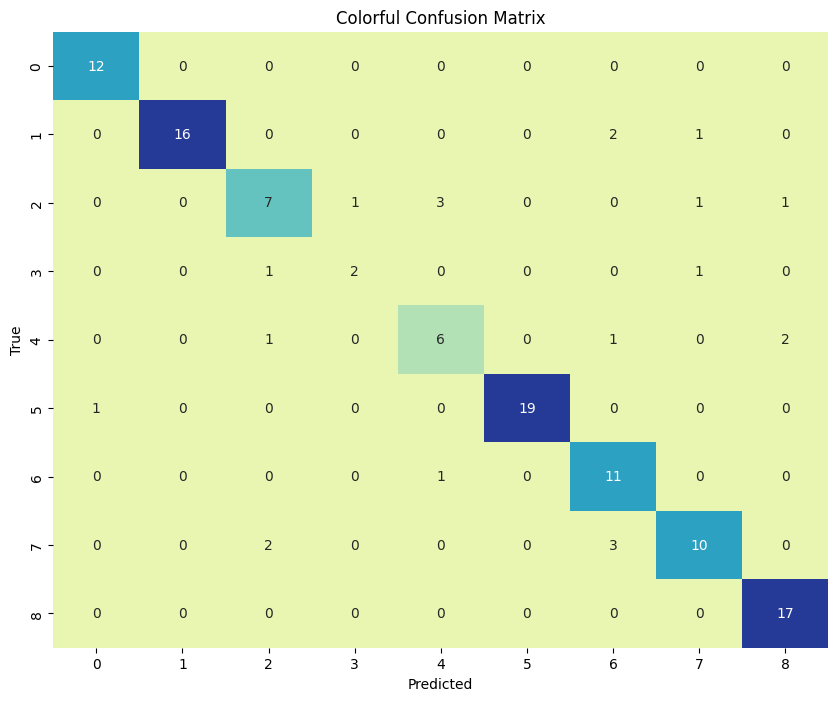

In [54]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get the predictions on the validation set
y_pred = best_model.predict(x_val_mel)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred_classes)

# Define a custom color palette
colors = sns.color_palette("YlGnBu")

# Display the confusion matrix with the custom color palette
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=colors, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Colorful Confusion Matrix')
plt.show()


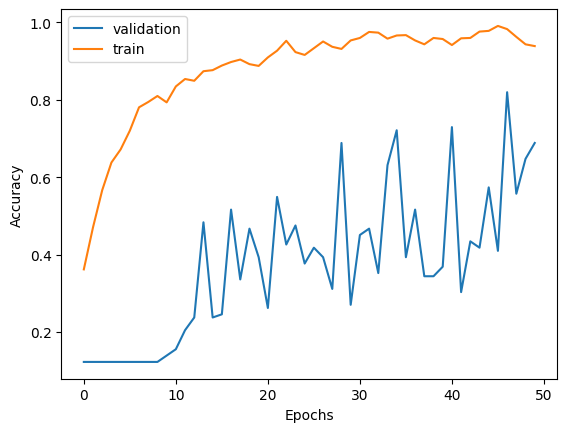

In [55]:
plt.plot(history.history['val_accuracy'],label='validation')
plt.plot(history.history['accuracy'],label='train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.savefig('Accuracy_vs_epoches_curve_LWACNN.png', dpi=1000)
plt.legend()